In [40]:
import os
import wandb
import copy 
import json
import pickle 

import pandas as pd 
print(pd.__version__)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import analyse_results_utils
from es_map import custom_configs
from es_map.my_brax_envs import brax_envs

1.4.2


In [41]:
with open('env_result_data.pickle', 'rb') as handle:
    env_result_data = pickle.load(handle)
with open('ES_grouped_runs.pickle', 'rb') as handle:
    ES_grouped_runs = pickle.load(handle)

In [ ]:
# Ok let us go over each metric
# Collect the relevant data from the 2 sets of data
# create the plots and the tables

In [ ]:
# METRICS

# Best fitness


In [79]:
def collect_metric(metric_name_data):
    
    # We want to collect the data in the following format:
    # {env_name : {algo_name : [run1_metric,run2_metric]}}
    
    comnined_data = {
    "ant" : {},
    "humanoid" : {}
    }
    
    # now order them with a custom order:
    algo_order = {
        'ES' : 'ES',
        'E-ES' : 'E-ES',
        'QE-ES' : 'QE-ES',
        'QDE-ES' : 'QDE-ES',
        "NO_BOTH_ME__exploit" : "ME_exploit",
        "NO_BOTH_ME__explore-exploit" : "ME_explore_exploit",
        "NO_EVOLVABILITY_SELECTION_EVAL_FITNESS" : "no_selection_eval",
        "NO_EVOLVABILITY_SELECTION" : "no_selection",
        "NO_EVOLVABILITY_UPDATE_MM" : "no_update_MM",
        "NO_EVOLVABILITY_UPDATE_ND" : "no_update_ND",
        "NO_EVOLVABILITY_UPDATE_NO_INNOV_MM" : "no_update_no_innov_MM",
        "NO_EVOLVABILITY_UPDATE_NO_INNOV_ND" : "no_update_no_innov_ND",
        "FULL_MM" : "FULL_MM",
        "FULL_ND" : "FULL_ND",
    }
    def sort_key(item):
            return list(algo_order.values()).index(item[0])
        
    for env_name in ["ant","humanoid"]:
        if metric_name_data["ES_NAME"] is not None:
            for algo_name,runs in ES_grouped_runs[env_name].items():
                algo_plot_name = algo_order[algo_name]
                comnined_data[env_name][algo_plot_name] = [run[metric_name_data["ES_NAME"]] for run in runs]
        for algo_name,runs in env_result_data[env_name].items():
            algo_plot_name = algo_order[algo_name]
            comnined_data[env_name][algo_plot_name] = [run[metric_name_data["MAP_NAME"]] for run in runs]
    
        
            
            
        
        comnined_data[env_name] = dict(sorted(comnined_data[env_name].items(), key=sort_key))
        comnined_data[env_name] = {algo_name : np.array(results) for algo_name,results in comnined_data[env_name].items()}
    
    return comnined_data

def plot_bolxplots(metric_name_data,combined_data):
    for env_name,env_data in combined_data.items():
        names = list(env_data.keys())
        values = list(env_data.values())

        sns.boxplot(data=values,color="white",saturation=0)#,whis=(0,100))
        sns.stripplot(data=values)#,color="black")
        plt.xticks(list(range(len(names))),names,rotation = 90)
        plt.ylabel(metric_name_data["METRIC_PLOT_NAME"])
        plt.title(env_name+" "+metric_name_data["METRIC_PLOT_NAME"])
        #plt.ylim(bottom=0)

        plt.show()
        
def create_table(combined_data):
    columns = {}
    for env_name,env_data in combined_data.items():

        result_column = []
        for algo_names,results in env_data.items():
            mean = np.mean(results)
            std = np.std(results)
            result_column.append("{:10.1f}".format(mean)+u"\u00B1"+"{:10.1f}".format(std))
        columns["algo_name"] = list(env_data.keys())
        columns[env_name] = result_column

    df = pd.DataFrame()
    for col_name,values in columns.items():
        df[col_name] = values

    df = df.style.highlight_max(subset=["ant","humanoid"],color = 'lightgreen', axis = 0)
    return df

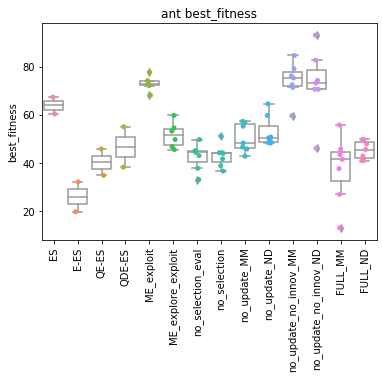

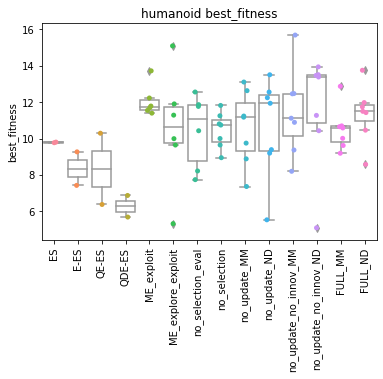

,algo_name,ant,humanoid
0,ES,63.9± 3.5,9.8± 0.0
1,E-ES,26.0± 6.2,8.3± 0.9
2,QE-ES,40.4± 5.5,8.3± 2.0
3,QDE-ES,46.7± 8.4,6.3± 0.6
4,ME_exploit,72.9± 2.8,12.1± 0.8
5,ME_explore_exploit,51.6± 4.8,10.5± 2.9
6,no_selection_eval,42.6± 5.1,10.4± 1.9
7,no_selection,43.0± 4.3,10.5± 0.9
8,no_update_MM,50.4± 5.5,10.6± 1.9
9,no_update_ND,53.0± 6.0,10.6± 2.6


In [69]:
# FIRST METRIC: Best fitness
# For map elites we have 
# - best_ever_eval_distance_walked
# - best_ever_child_mean_distance_walked  # Dont care about this one
# - best_ever_child_distance_walked

# For ES we have 
# - best_eval_fitness
# - best_fitness

metric_name_data = {
    "METRIC_PLOT_NAME" : "best_fitness",
    "ES_NAME" : "best_fitness",
    "MAP_NAME" : "best_ever_child_distance_walked",
}
combined_data = collect_metric(metric_name_data)
plot_bolxplots(metric_name_data,combined_data)

df = create_table(combined_data)
df

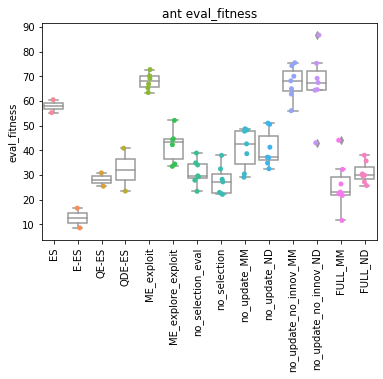

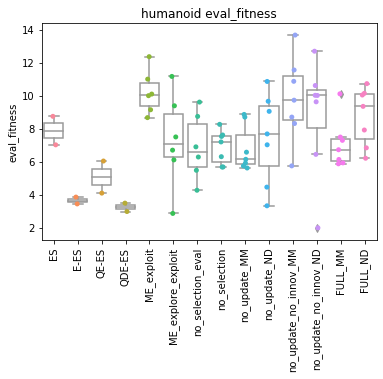

,algo_name,ant,humanoid
0,ES,57.9± 2.6,7.9± 0.9
1,E-ES,12.6± 4.0,3.7± 0.2
2,QE-ES,28.1± 2.7,5.1± 1.0
3,QDE-ES,32.1± 8.7,3.2± 0.3
4,ME_exploit,67.9± 3.1,10.2± 1.2
5,ME_explore_exploit,41.9± 6.4,7.3± 2.6
6,no_selection_eval,31.1± 4.8,6.9± 1.8
7,no_selection,27.6± 5.5,6.9± 0.9
8,no_update_MM,40.8± 7.7,6.8± 1.3
9,no_update_ND,40.6± 6.9,7.4± 2.5


In [70]:
metric_name_data = {
    "METRIC_PLOT_NAME" : "eval_fitness",
    "ES_NAME" : "best_eval_fitness",
    "MAP_NAME" : "best_ever_eval_distance_walked",
}
combined_data = collect_metric(metric_name_data)
plot_bolxplots(metric_name_data,combined_data)

df = create_table(combined_data)
df

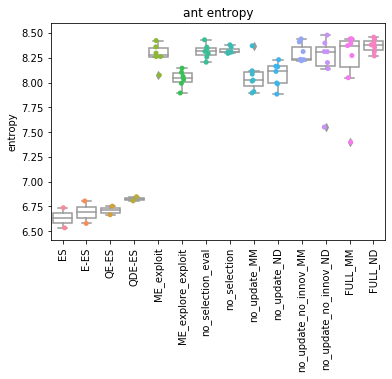

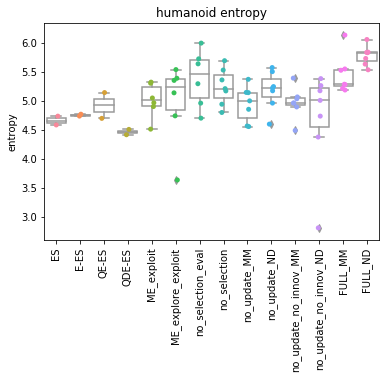

,algo_name,ant,humanoid
0,ES,6.6± 0.1,4.7± 0.1
1,E-ES,6.7± 0.1,4.8± 0.0
2,QE-ES,6.7± 0.0,4.9± 0.2
3,QDE-ES,6.8± 0.0,4.5± 0.0
4,ME_exploit,8.3± 0.1,5.0± 0.3
5,ME_explore_exploit,8.0± 0.1,5.0± 0.6
6,no_selection_eval,8.3± 0.1,5.4± 0.4
7,no_selection,8.3± 0.0,5.2± 0.3
8,no_update_MM,8.1± 0.1,4.9± 0.3
9,no_update_ND,8.1± 0.1,5.2± 0.3


In [71]:
metric_name_data = {
    "METRIC_PLOT_NAME" : "entropy",
    "ES_NAME" : "best_evo_ent",
    "MAP_NAME" : "evo_ent",
}
combined_data = collect_metric(metric_name_data)
plot_bolxplots(metric_name_data,combined_data)

df = create_table(combined_data)
df

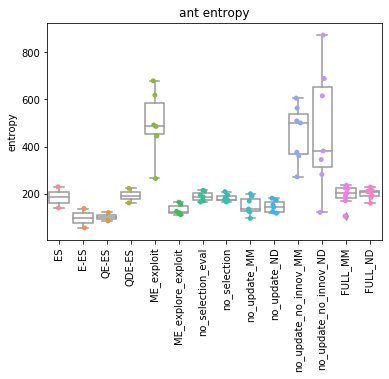

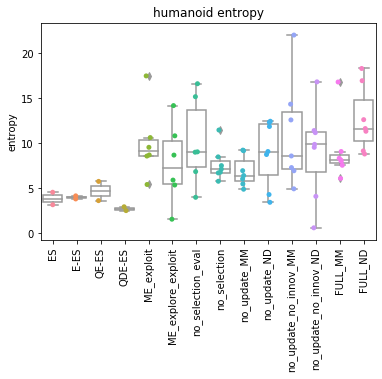

,algo_name,ant,humanoid
0,ES,184.9± 44.9,3.9± 0.7
1,E-ES,96.8± 41.0,4.0± 0.2
2,QE-ES,103.1± 17.9,4.7± 1.1
3,QDE-ES,192.3± 30.8,2.7± 0.2
4,ME_exploit,497.7± 132.0,10.1± 3.7
5,ME_explore_exploit,132.3± 20.2,7.8± 4.1
6,no_selection_eval,188.5± 18.1,10.1± 4.4
7,no_selection,182.1± 14.3,7.7± 1.7
8,no_update_MM,149.1± 35.6,6.9± 1.6
9,no_update_ND,145.4± 23.4,8.9± 3.5


In [74]:
metric_name_data = {
    "METRIC_PLOT_NAME" : "entropy",
    "ES_NAME" : "best_evo_var",
    "MAP_NAME" : "evo_var",
}
combined_data = collect_metric(metric_name_data)
plot_bolxplots(metric_name_data,combined_data)

df = create_table(combined_data)
df

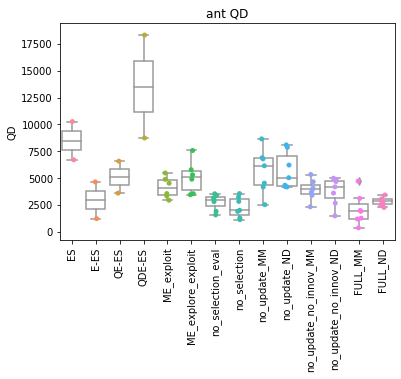

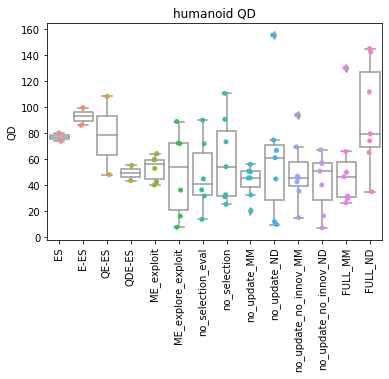

,algo_name,ant,humanoid
0,ES,8489.0± 1779.2,77.3± 3.3
1,E-ES,2943.2± 1710.5,93.1± 6.8
2,QE-ES,5091.6± 1488.5,78.4± 30.1
3,QDE-ES,13527.6± 4788.9,49.6± 5.8
4,ME_exploit,4127.6± 901.1,53.3± 9.1
5,ME_explore_exploit,5098.1± 1399.2,49.1± 30.6
6,no_selection_eval,2772.6± 691.2,48.3± 25.6
7,no_selection,2281.8± 874.3,59.9± 30.5
8,no_update_MM,5677.7± 1900.6,43.3± 11.4
9,no_update_ND,5707.0± 1581.7,60.9± 45.4


In [75]:
metric_name_data = {
    "METRIC_PLOT_NAME" : "QD",
    "ES_NAME" : "QD_CUMM",
    "MAP_NAME" : "perf_qd_mean_dist",
}
combined_data = collect_metric(metric_name_data)
plot_bolxplots(metric_name_data,combined_data)

df = create_table(combined_data)
df

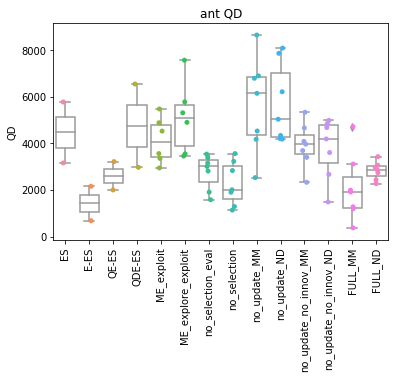

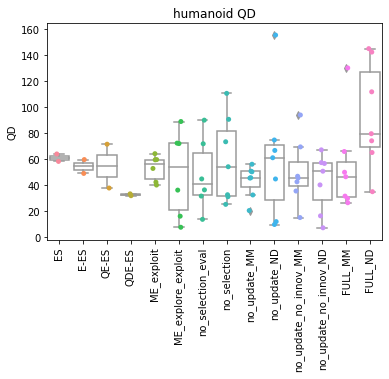

,algo_name,ant,humanoid
0,ES,4471.3± 1308.9,61.4± 2.9
1,E-ES,1421.8± 739.3,54.6± 5.3
2,QE-ES,2610.7± 609.1,54.9± 16.9
3,QDE-ES,4761.7± 1789.3,32.8± 0.7
4,ME_exploit,4127.6± 901.1,53.3± 9.1
5,ME_explore_exploit,5098.1± 1399.2,49.1± 30.6
6,no_selection_eval,2772.6± 691.2,48.3± 25.6
7,no_selection,2281.8± 874.3,59.9± 30.5
8,no_update_MM,5677.7± 1900.6,43.3± 11.4
9,no_update_ND,5707.0± 1581.7,60.9± 45.4


In [76]:
metric_name_data = {
    "METRIC_PLOT_NAME" : "QD",
    "ES_NAME" : "QD",
    "MAP_NAME" : "perf_qd_mean_dist",
}
combined_data = collect_metric(metric_name_data)
plot_bolxplots(metric_name_data,combined_data)

df = create_table(combined_data)
df

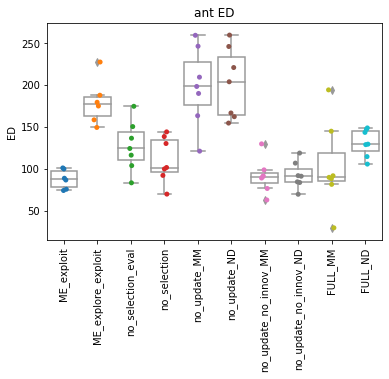

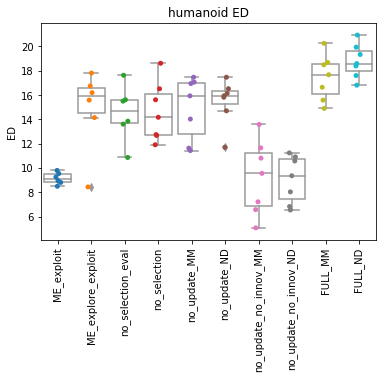

,algo_name,ant,humanoid
0,ME_exploit,87.7± 10.5,9.1± 0.4
1,ME_explore_exploit,179.6± 25.0,14.8± 3.1
2,no_selection_eval,127.0± 28.0,14.5± 2.1
3,no_selection,110.9± 25.3,14.6± 2.2
4,no_update_MM,198.2± 43.8,14.9± 2.4
5,no_update_ND,202.0± 39.1,15.5± 1.7
6,no_update_no_innov_MM,91.3± 19.2,9.2± 2.8
7,no_update_no_innov_ND,92.3± 14.9,9.1± 1.8
8,FULL_MM,102.8± 48.5,17.5± 1.7
9,FULL_ND,131.1± 15.3,18.8± 1.3


In [80]:
metric_name_data = {
    "METRIC_PLOT_NAME" : "ED",
    "ES_NAME" : None,
    "MAP_NAME" : "evolver_ed_ent_score",
}
combined_data = collect_metric(metric_name_data)
plot_bolxplots(metric_name_data,combined_data)

df = create_table(combined_data)
df

In [29]:
env_result_data["ant"].keys()

dict_keys(['NO_EVOLVABILITY_SELECTION_EVAL_FITNESS', 'NO_EVOLVABILITY_SELECTION', 'NO_EVOLVABILITY_UPDATE_ND', 'NO_EVOLVABILITY_UPDATE_NO_INNOV_MM', 'NO_EVOLVABILITY_UPDATE_NO_INNOV_ND', 'NO_EVOLVABILITY_UPDATE_MM', 'FULL_ND', 'FULL_MM', 'NO_BOTH_ME__explore-exploit', 'NO_BOTH_ME__exploit'])

In [12]:
ES_grouped_runs["ant"].keys()

dict_keys(['QDE-ES', 'QE-ES', 'E-ES', 'ES'])

In [8]:
env_result_data["ant"]["NO_EVOLVABILITY_SELECTION_EVAL_FITNESS"][0]

{'best_ever_eval_distance_walked': array(23.358067, dtype=float32),
 'best_ever_child_mean_distance_walked': array(21.563671, dtype=float32),
 'best_ever_child_distance_walked': array(33.12736, dtype=float32),
 'evolver_ed_ent_score': 83.2664571400585,
 'perf_qd_mean_dist': 1582.2871,
 'evo_ent': 8.31421297391241,
 'evo_var': 211.9371795654297}

In [10]:
ES_grouped_runs["ant"]["QDE-ES"]

[{'best_eval_fitness': 23.456655502319336,
  'best_fitness': 38.32007598876953,
  'best_evo_ent': 6.805555840806088,
  'best_evo_var': 161.58978271484375,
  'QD': 2972.449951171875,
  'QD_CUMM': 8738.6962890625},
 {'best_eval_fitness': 40.8178596496582,
  'best_fitness': 55.04482650756836,
  'best_evo_ent': 6.84735553527403,
  'best_evo_var': 223.10458374023438,
  'QD': 6551.0390625,
  'QD_CUMM': 18316.44921875}]